<a href="https://colab.research.google.com/github/somiljain7/memeforecast/blob/main/fbprophet_doge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
from google.colab import files
uploaded = files.upload()
import io
doge_df = pd.read_csv(io.BytesIO(uploaded['DOGE-USD.csv'])) 

Saving DOGE-USD.csv to DOGE-USD (1).csv


In [3]:
doge_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-14,0.002518,0.002623,0.002512,0.002574,0.002574,283778649.0
1,2020-05-15,0.002574,0.002577,0.002487,0.002506,0.002506,261080156.0
2,2020-05-16,0.002507,0.002534,0.002484,0.002513,0.002513,254666485.0
3,2020-05-17,0.002512,0.002578,0.002509,0.002538,0.002538,258469067.0
4,2020-05-18,0.002537,0.002587,0.002513,0.002543,0.002543,265626959.0


In [4]:
doge_df=doge_df.sort_values("Date")

In [6]:
doge_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-14,0.002518,0.002623,0.002512,0.002574,0.002574,2.837786e+08
1,2020-05-15,0.002574,0.002577,0.002487,0.002506,0.002506,2.610802e+08
2,2020-05-16,0.002507,0.002534,0.002484,0.002513,0.002513,2.546665e+08
3,2020-05-17,0.002512,0.002578,0.002509,0.002538,0.002538,2.584691e+08
4,2020-05-18,0.002537,0.002587,0.002513,0.002543,0.002543,2.656270e+08
...,...,...,...,...,...,...,...
361,2021-05-10,0.569687,0.569687,0.421291,0.449964,0.449964,1.651452e+10
362,2021-05-11,0.450488,0.546651,0.445034,0.495231,0.495231,1.456698e+10
363,2021-05-12,0.493742,0.519975,0.385376,0.385376,0.385376,8.621338e+09
364,2021-05-13,0.392176,0.519461,0.357175,0.490374,0.490374,1.866317e+10


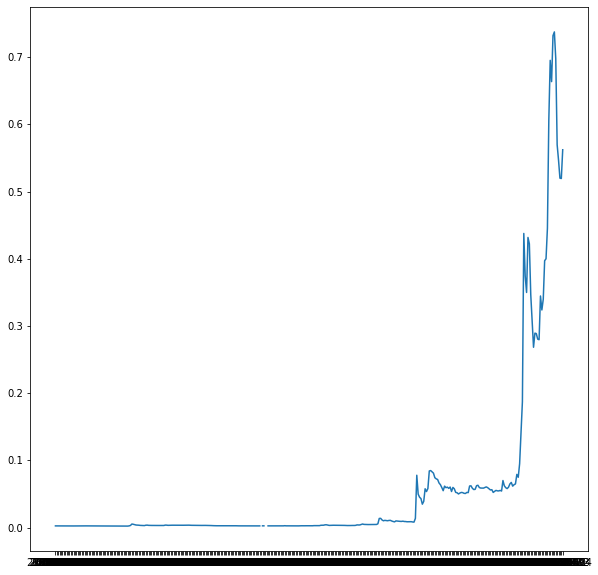

In [7]:
plt.figure(figsize=(10,10))
plt.plot(doge_df['Date'], doge_df['High'] )

In [16]:

doge_df=doge_df[['Date','High']]


In [18]:
doge_df = doge_df.rename(columns={'Date':'ds' , 'High':'y' })

In [19]:
doge_df

,ds,y
0,2020-05-14,0.002623
1,2020-05-15,0.002577
2,2020-05-16,0.002534
3,2020-05-17,0.002578
4,2020-05-18,0.002587
...,...,...
361,2021-05-10,0.569687
362,2021-05-11,0.546651
363,2021-05-12,0.519975
364,2021-05-13,0.519461


In [20]:
m = Prophet()
m.fit(doge_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=365)
forecast= m.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-14,0.000096,-0.083957,0.074819,0.000096,0.000096,-0.001641,-0.001641,-0.001641,-0.001641,-0.001641,-0.001641,0.0,0.0,0.0,-0.001544
1,2020-05-15,0.000122,-0.070437,0.083728,0.000122,0.000122,0.004466,0.004466,0.004466,0.004466,0.004466,0.004466,0.0,0.0,0.0,0.004588
2,2020-05-16,0.000148,-0.082707,0.074499,0.000148,0.000148,0.001073,0.001073,0.001073,0.001073,0.001073,0.001073,0.0,0.0,0.0,0.001221
3,2020-05-17,0.000174,-0.077310,0.075800,0.000174,0.000174,-0.000792,-0.000792,-0.000792,-0.000792,-0.000792,-0.000792,0.0,0.0,0.0,-0.000618
4,2020-05-18,0.000200,-0.083533,0.075238,0.000200,0.000200,-0.002167,-0.002167,-0.002167,-0.002167,-0.002167,-0.002167,0.0,0.0,0.0,-0.001968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2022-05-10,2.360326,1.988414,2.775201,1.992479,2.753399,-0.000835,-0.000835,-0.000835,-0.000835,-0.000835,-0.000835,0.0,0.0,0.0,2.359491
727,2022-05-11,2.365665,1.993368,2.759159,1.995839,2.759697,-0.000104,-0.000104,-0.000104,-0.000104,-0.000104,-0.000104,0.0,0.0,0.0,2.365561
728,2022-05-12,2.371005,1.984686,2.759678,2.000054,2.765952,-0.001641,-0.001641,-0.001641,-0.001641,-0.001641,-0.001641,0.0,0.0,0.0,2.369364
729,2022-05-13,2.376344,1.991338,2.788436,2.004090,2.772152,0.004466,0.004466,0.004466,0.004466,0.004466,0.004466,0.0,0.0,0.0,2.380810


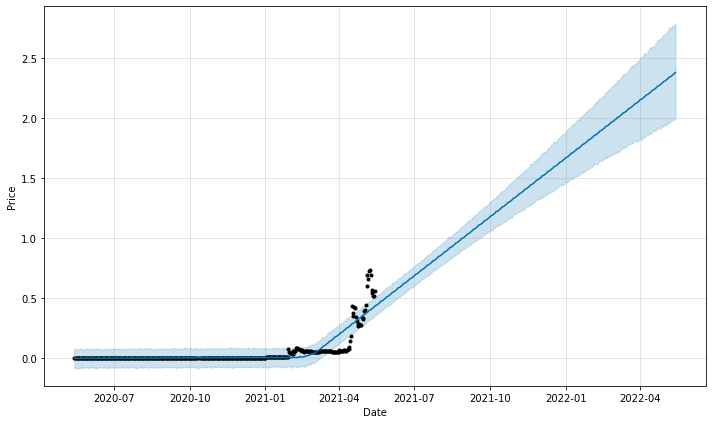

In [23]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

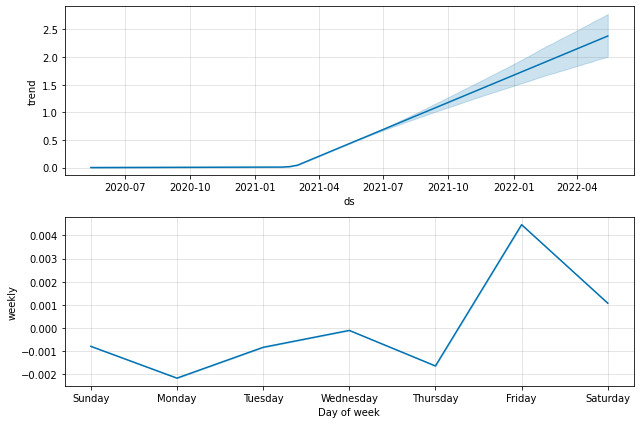

In [25]:
figure2= m.plot_components(forecast)